# Machine Learning

### Laura Isabella Forero Camacho
### Liliia Aliakberova

# Part 1 Explaratory analysis
* * *


### 1 Step Loading the datasets

Importing required packages

To do:
- Whole dataset weekend weekdays
- central tendency
- Some visualisation
- correlation matrix
- diagrams
- categorical/ numerical (check the calculation)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Create a list of all files and add the corresponding city names and day type

In [2]:
data = [("/Users/lauraforerocamacho/Downloads/data/amsterdam_weekdays.csv", "Amsterdam", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/athens_weekdays.csv", "Athens","Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/barcelona_weekdays.csv", "Barcelona", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/berlin_weekdays.csv", "Berlin", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/budapest_weekdays.csv", "Budapest", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/lisbon_weekdays.csv", "Lisbon", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/London_weekdays.csv", "London", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/rome_weekdays.csv", "Rome", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/paris_weekdays.csv", "Paris", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/Vienna_weekdays.csv", "Vienna", "Weekdays"),
                 ("/Users/lauraforerocamacho/Downloads/data/amsterdam_weekends.csv", "Amsterdam", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/athens_weekends.csv", "Athens", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/barcelona_weekends.csv", "Barcelona", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/berlin_weekends.csv", "Berlin", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/budapest_weekends.csv", "Budapest", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/lisbon_weekends.csv", "Lisbon", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/London_weekends.csv", "London", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/rome_weekends.csv", "Rome", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/paris_weekends.csv", "Paris", "Weekends"),
                 ("/Users/lauraforerocamacho/Downloads/data/Vienna_weekends.csv", "Vienna", "Weekends")]


Merg data from all csv into one data frame 

In [3]:
dfs = []
for file_path, city_name, day_type in data:
    df = pd.read_csv(file_path, usecols=lambda col: col != 'Unnamed: 0')
    df = df.assign(city=city_name, type=day_type)
    dfs.append(df)
data = pd.concat(dfs)

Print top 5 rows 

In [4]:
print(data.head(5))

      realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378

The length and number of columns of the formed dataset

In [5]:
data.shape

(51707, 21)

Get descriptive information about the dataset

In [6]:
numeric_colums= ["realSum", "person_capacity","cleanliness_rating","guest_satisfaction_overall",'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat']
categorical_colums= ["room_type","room_shared", "room_private", "host_is_superhost","multi", "biz" , 'city', 'type']

In [7]:
len(numeric_colums)

13

In [8]:
len(categorical_colums)

8

In [13]:
# Describe to Numeric Values
data[numeric_colums].describe()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450280,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [12]:
# Describe to Categorical Values
data[categorical_colums].astype('object').describe()


,room_type,room_shared,room_private,host_is_superhost,multi,biz,city,type
count,51707,51707,51707,51707,51707,51707,51707,51707
unique,3,2,2,2,2,2,10,2
top,Entire home/apt,False,False,False,0,0,London,Weekends
freq,32648,51341,33014,38475,36642,33599,9993,26207


<AxesSubplot:xlabel='type'>

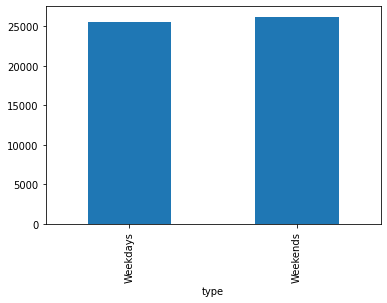

In [45]:
import matplotlib.pyplot as plt
#"room_type","room_shared", "room_private", "host_is_superhost","multi", "biz" , 'city', 'type'
GroupedData=data.groupby(by="type").size()
GroupedData.plot.bar()

In [6]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450280,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


A shorter summary of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  5170

Find the duplicates 

In [14]:
data.duplicated().sum()

0

Find null values

In [15]:
data.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
type                          0
dtype: int64

Create boxplot for 'realSum' attribute

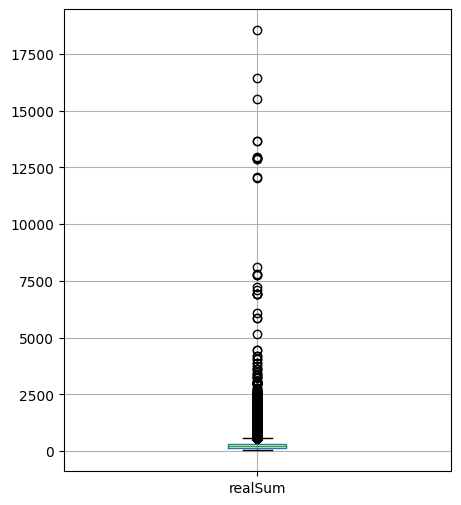

In [15]:
data[['realSum']].boxplot(figsize=(5, 6))
plt.show()

Create boxplot for 'multi','biz'attributes

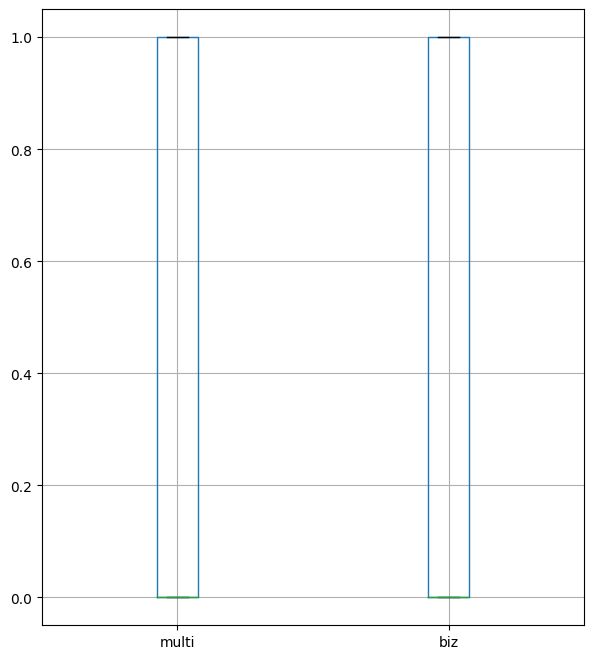

In [27]:
data[['multi','biz']].boxplot(figsize=(7, 8))
plt.show()

Create boxplot for 'cleanliness_rating','dist','metro_dist' attributes

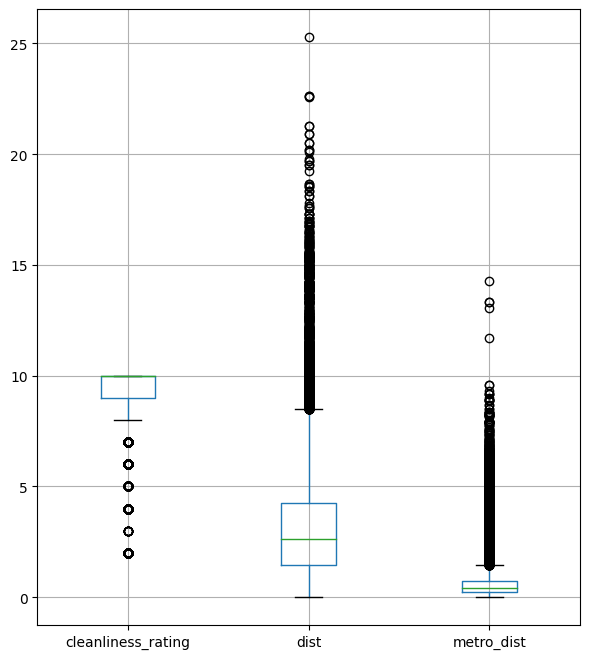

In [29]:
data[['cleanliness_rating','dist','metro_dist']].boxplot(figsize=(7, 8))
plt.show()

Create boxplot for 'guest_satisfaction_overall','attr_index_norm','rest_index_norm' attributes

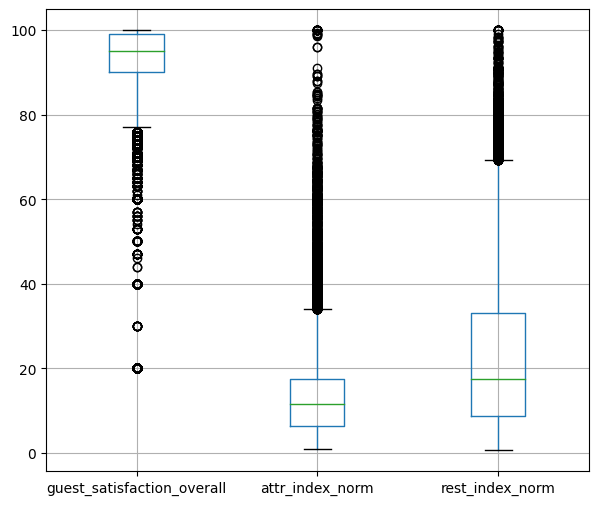

In [17]:
data[['guest_satisfaction_overall','attr_index_norm','rest_index_norm']].boxplot(figsize=(7, 6))
plt.show()

Create boxplot for 'attr_index','rest_index'attributes

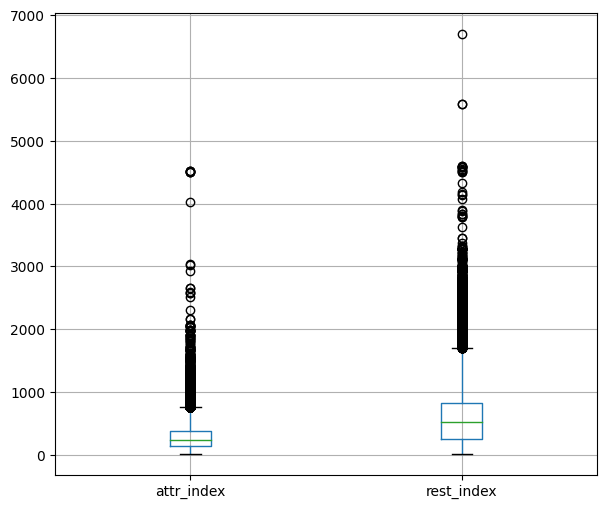

In [18]:
data[['attr_index','rest_index']].boxplot(figsize=(7, 6))
plt.show()

Get the correlation matrix for the numeric values of the datasert

In [19]:
data.corr(numeric_only=True)

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
realSum,1.000000,-0.035095,-0.171949,0.203077,-0.045478,-0.052926,0.037144,-0.006082,-0.001888,0.221653,-0.044725,-0.061025,0.178228,0.292396,0.134722,0.144094,-0.173833,0.211805
room_shared,-0.035095,1.000000,-0.063533,0.035146,-0.027839,-0.016061,0.044406,-0.040097,-0.027876,-0.021365,0.014144,-0.002868,-0.031458,-0.006137,-0.031297,0.005711,-0.027829,0.023304
room_private,-0.171949,-0.063533,1.000000,-0.499993,-0.049501,0.137026,-0.040198,-0.030983,-0.033401,-0.155889,0.213351,0.101981,-0.022286,0.029140,-0.022343,-0.136846,-0.201709,0.140762
person_capacity,0.203077,0.035146,-0.499993,1.000000,0.031431,-0.054326,0.110668,0.003256,0.005181,0.560627,-0.128488,-0.037267,0.028394,-0.050487,0.037330,0.038059,0.146848,-0.168265
host_is_superhost,-0.045478,-0.027839,-0.049501,0.031431,1.000000,0.097520,-0.108506,0.272376,0.280062,0.024250,-0.056113,-0.000722,-0.026335,-0.088949,-0.035060,-0.018348,0.185748,-0.113811
multi,-0.052926,-0.016061,0.137026,-0.054326,0.097520,1.000000,-0.470725,0.041064,0.054254,-0.000659,0.033426,0.043365,0.006319,-0.041412,0.007051,-0.037402,0.041260,-0.034058
biz,0.037144,0.044406,-0.040198,0.110668,-0.108506,-0.470725,1.000000,-0.107310,-0.208160,-0.026741,-0.164767,-0.109153,0.114732,0.093720,0.137747,0.083999,-0.088943,-0.126433
cleanliness_rating,-0.006082,-0.040097,-0.030983,0.003256,0.272376,0.041064,-0.107310,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.025322,-0.075372,-0.031929,-0.005995,0.120379,-0.092502
guest_satisfaction_overall,-0.001888,-0.027876,-0.033401,0.005181,0.280062,0.054254,-0.208160,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.050624,-0.074146,-0.069319,-0.008765,0.156079,-0.033957
bedrooms,0.221653,-0.021365,-0.155889,0.560627,0.024250,-0.000659,-0.026741,0.033489,0.047573,1.000000,-0.006262,0.044431,-0.011735,-0.063773,-0.014047,-0.057726,0.013688,-0.104694


Visualize the corelation matrix

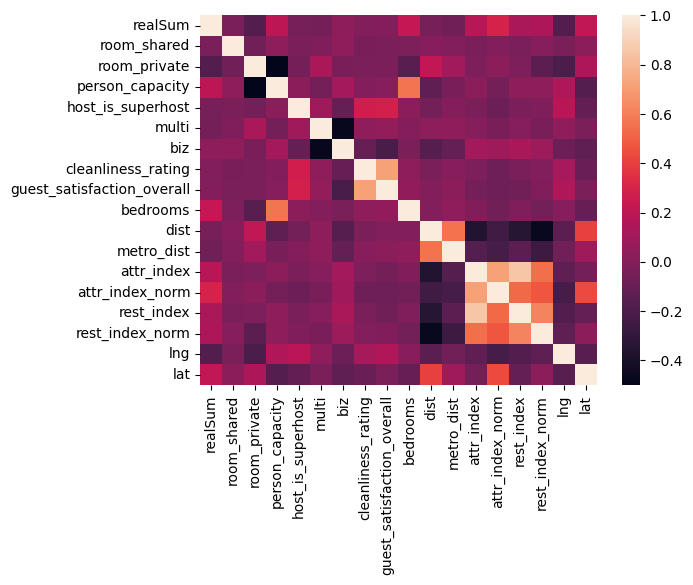

In [23]:
sns.heatmap(data.corr(numeric_only=True))
plt.show()

The airbnb price distribution https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python

count    51707.000000
mean       279.879591
std        327.948386
min         34.779339
25%        148.752174
50%        211.343089
75%        319.694287
max      18545.450280
Name: realSum, dtype: float64


/var/folders/1r/3fk_x7p96299qsbl_p0t7v6h0000gn/T/ipykernel_37144/2720373988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['realSum'], color='y', bins=100, hist_kws={'alpha': 0.4})


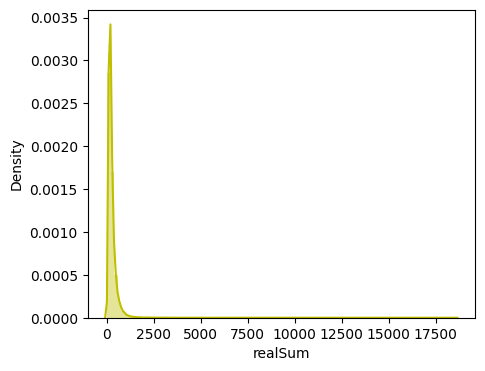

In [61]:
print(data['realSum'].describe())
plt.figure(figsize=(6, 4))
sns.distplot(data['realSum'], color='y', bins=100, hist_kws={'alpha': 0.2})
plt.show()

Numerical data destribution

List all the types of our data from our dataset and take only the numerical ones:

In [32]:
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')]

In [33]:
data_num = dar=data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,2.0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,4.0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,2.0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,4.0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,2.0,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


Plot the numerical data destribution

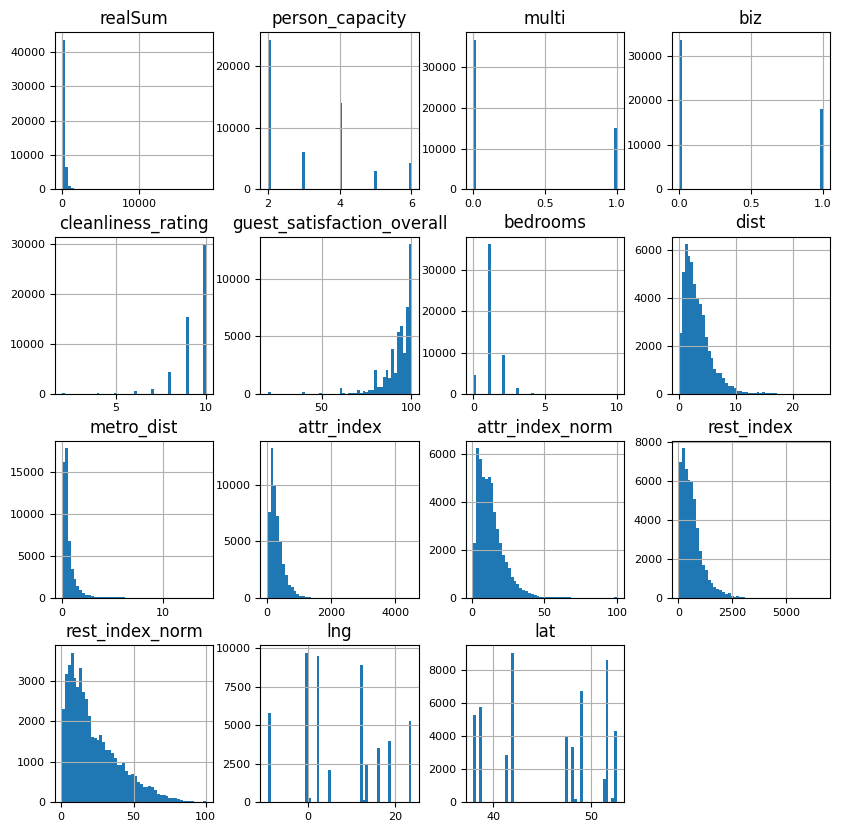

In [37]:
data_num.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

Correlation with realSum

In [66]:
data_num_corr = data_num.corr()['realSum']
golden_features_list = data_num_corr.sort_values(ascending=False)
print("There is {} strongly correlated values with realSum:\n{}".format(len(golden_features_list), golden_features_list))

There is 15 strongly correlated values with realSum:
realSum                       1.000000
attr_index_norm               0.292396
bedrooms                      0.221653
lat                           0.211805
person_capacity               0.203077
attr_index                    0.178228
rest_index_norm               0.144094
rest_index                    0.134722
biz                           0.037144
guest_satisfaction_overall   -0.001888
cleanliness_rating           -0.006082
dist                         -0.044725
multi                        -0.052926
metro_dist                   -0.061025
lng                          -0.173833
Name: realSum, dtype: float64


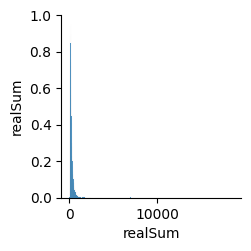

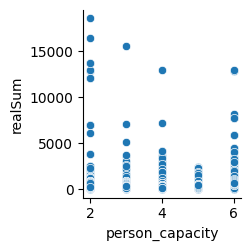

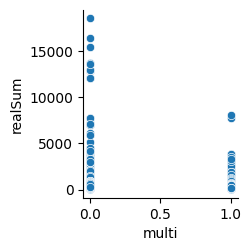

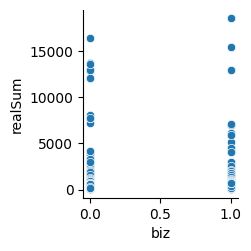

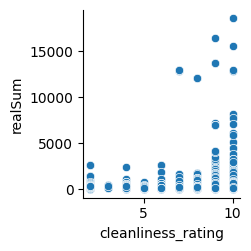

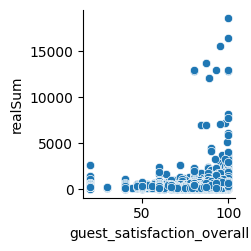

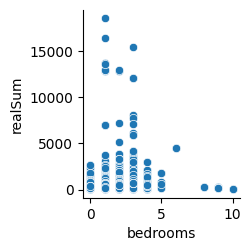

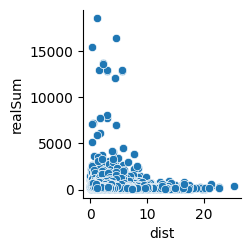

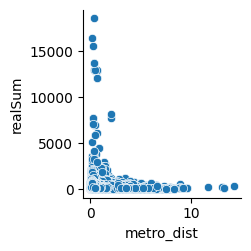

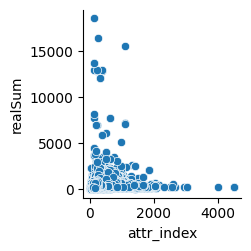

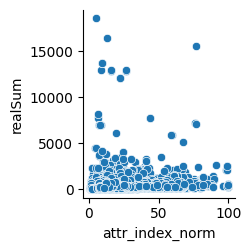

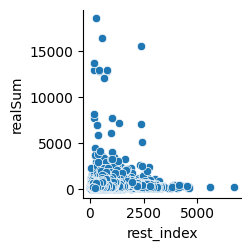

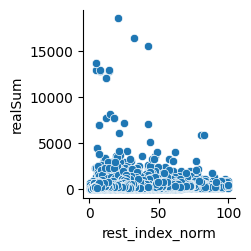

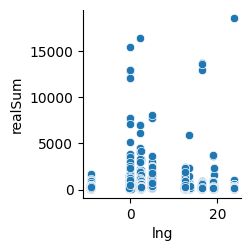

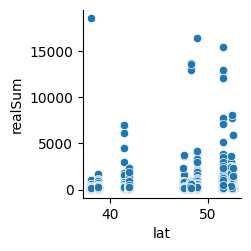

In [73]:
for i in range(0, len(data_num.columns)):
    sns.pairplot(data=data_num,
                 x_vars=[data_num.columns[i]],
                 y_vars=['realSum'])
    plt.show()

Creat the dataset groupped by "city" and "type" attributes

In [16]:
grouped_city_type = data.groupby(['city', 'type'])

Get total sales per city and day type

In [86]:
sales_per_city_type = grouped_city_type['realSum'].sum()

prev_city = None
for (city, type), value in sales_per_city_type.items():
    if city != prev_city:
        print(city)
        prev_city = city
    print('  {}: {:.2f}'.format(type, value))

Amsterdam
  Weekdays: 601157.64
  Weekends: 590916.97
Athens
  Weekdays: 413515.10
  Weekends: 387693.86
Barcelona
  Weekdays: 448449.04
  Weekends: 383755.21
Berlin
  Weekdays: 308443.02
  Weekends: 299103.02
Budapest
  Weekdays: 349322.51
  Weekends: 360614.98
Lisbon
  Weekdays: 675238.98
  Weekends: 697568.01
London
  Weekdays: 1662102.82
  Weekends: 1960052.45
Paris
  Weekdays: 1248202.30
  Weekends: 1377047.72
Rome
  Weekdays: 905668.30
  Weekends: 948404.83
Vienna
  Weekdays: 417788.84
  Weekends: 436688.40


Visualize total sales

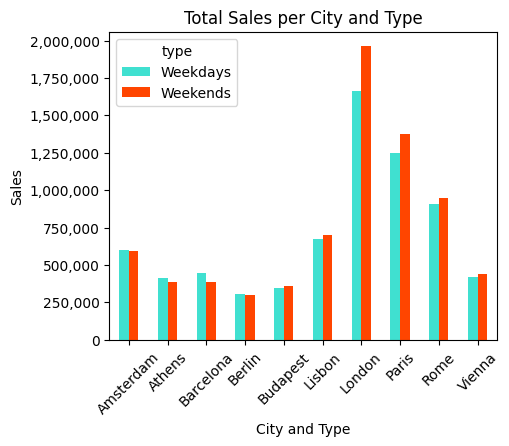

In [49]:
fig, ax = plt.subplots(figsize=(5, 4))
sales_per_city_and_type.unstack().plot(kind='bar', ax=ax, color=['turquoise', 'orangered'])

ax.set_xlabel('City and Type')
ax.set_ylabel('Sales')
ax.set_title('Total Sales per City and Type')
ax.yaxis.set_major_formatter('{x:,.0f}')

plt.xticks(rotation=45)

plt.show()

Get total sales per city and day type

In [88]:
avg_sales_per_city_type = grouped_city_type['realSum'].mean()

prev_city = None
for (city, type), value in sales_per_city_type.items():
    if city != prev_city:
        print(city)
        prev_city = city
    print('  {}: {:.2f}'.format(type, value))

Amsterdam
  Weekdays: 601157.64
  Weekends: 590916.97
Athens
  Weekdays: 413515.10
  Weekends: 387693.86
Barcelona
  Weekdays: 448449.04
  Weekends: 383755.21
Berlin
  Weekdays: 308443.02
  Weekends: 299103.02
Budapest
  Weekdays: 349322.51
  Weekends: 360614.98
Lisbon
  Weekdays: 675238.98
  Weekends: 697568.01
London
  Weekdays: 1662102.82
  Weekends: 1960052.45
Paris
  Weekdays: 1248202.30
  Weekends: 1377047.72
Rome
  Weekdays: 905668.30
  Weekends: 948404.83
Vienna
  Weekdays: 417788.84
  Weekends: 436688.40


Visualize average sales

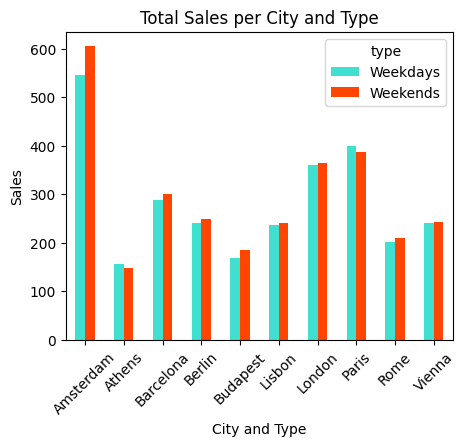

In [89]:
fig, ax = plt.subplots(figsize=(5, 4))
avg_sales_per_city_type.unstack().plot(kind='bar', ax=ax, color=['turquoise', 'orangered'])

ax.set_xlabel('City and Type')
ax.set_ylabel('Sales')
ax.set_title('Total Sales per City and Type')
ax.yaxis.set_major_formatter('{x:,.0f}')

plt.xticks(rotation=45)

plt.show()